In [69]:
using LinRegOutliers, Plots

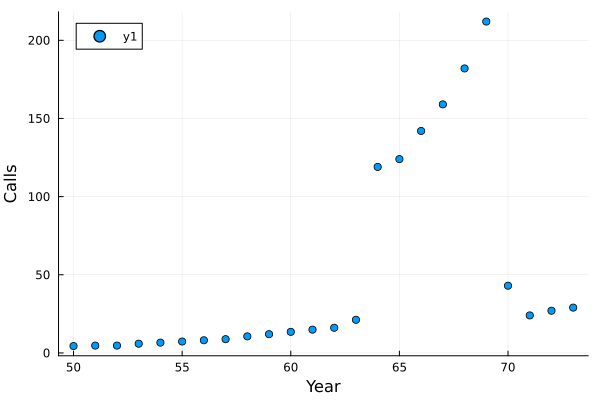

In [70]:
plt = Plots.scatter(phones[!, "year"], phones[!, "calls"], xlab = "Year", ylab = "Calls")

In [71]:
sett = createRegressionSetting(@formula(calls ~ year), phones)

RegressionSetting(calls ~ year, 24×2 DataFrame
 Row │ year   calls   
     │ Int64  Float64 
─────┼────────────────
   1 │    50      4.4
   2 │    51      4.7
   3 │    52      4.7
   4 │    53      5.9
   5 │    54      6.6
   6 │    55      7.3
   7 │    56      8.1
   8 │    57      8.8
   9 │    58     10.6
  10 │    59     12.0
  11 │    60     13.5
  ⋮  │   ⋮       ⋮
  15 │    64    119.0
  16 │    65    124.0
  17 │    66    142.0
  18 │    67    159.0
  19 │    68    182.0
  20 │    69    212.0
  21 │    70     43.0
  22 │    71     24.0
  23 │    72     27.0
  24 │    73     29.0
        3 rows omitted)

In [72]:
q25 = quantileregression(sett, tau = 0.25)

Dict{Any, Any} with 3 entries:
  "betas"     => [-56.0769, 1.15385]
  "model"     => A JuMP Model…
  "residuals" => [2.78462, 1.93077, 0.776923, 0.823077, 0.369231, -0.0846154, -…

In [73]:
q50 = quantileregression(sett, tau = 0.5)

Dict{Any, Any} with 3 entries:
  "betas"     => [-75.19, 1.53]
  "model"     => A JuMP Model…
  "residuals" => [3.09, 1.86, 0.33, 2.30926e-14, -0.83, -1.66, -2.39, -3.22, -2…

In [74]:
q75 = quantileregression(sett, tau = 0.75)

Dict{Any, Any} with 3 entries:
  "betas"     => [-505.271, 9.80714]
  "model"     => A JuMP Model…
  "residuals" => [19.3143, 9.80714, 1.25233e-13, -8.60714, -17.7143, -26.8214, …

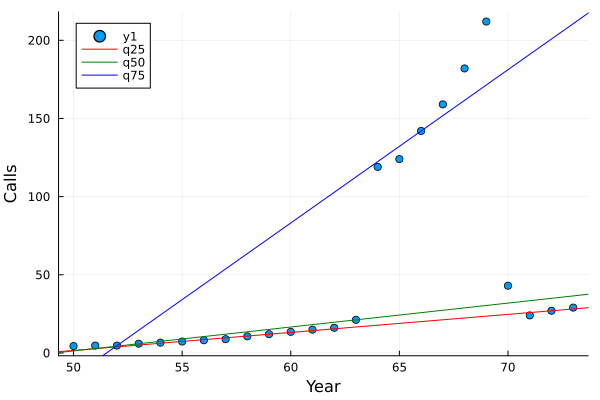

In [75]:
Plots.abline!(plt, q25["betas"][2], q25["betas"][1], label = "q25", color = :red)
Plots.abline!(plt, q50["betas"][2], q50["betas"][1], label = "q50", color = :green)
Plots.abline!(plt, q75["betas"][2], q75["betas"][1], label = "q75", color = :blue)

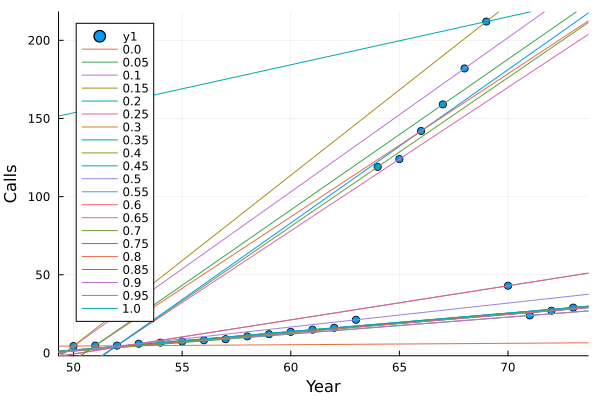

In [76]:
plt2 = Plots.scatter(phones[!, "year"], phones[!, "calls"], xlab = "Year", ylab = "Calls")
for q in 0:(0.05):1
    reg = quantileregression(sett, tau = q)
    Plots.abline!(plt2, reg["betas"][2], reg["betas"][1], label = string(q))
end 
display(plt2)